# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Рудов Сергей. Вариант №23

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
Регрессионные модели:
- Общая формула: $\mathbb{E}{\theta}(Y|z)=f{\theta}(z)$, где $Y$ - наблюдения, $z$ - ковариата.
- Линейная регрессия: $\mathbb{E}_{\theta}(Y|z)=x(z)^\intercal\beta$, где $\beta$ - параметры, $x(z)$ - регрессоры.
- Статистическая модель: $\mathbb{E}_{\theta}(Y|z)=X^\intercal\beta$, $Var(Y|z) = \sigma^2E$.

Метод наименьших квадратов (МНК):
- Альтернативная форма: $Y = X^\intercal\beta + \varepsilon$.
- Минимизация $RSS(\beta)=\left| Y-X^\intercal\beta \right|^2$.
- Нормальные уравнения: $XX^\intercal\beta=XY$.
- Решение: $\hat{\beta}=(XX^\intercal)^{-1}XY$.

Оценка параметра $\sigma^2$:
- $S^2 =\frac{RSS(\hat{\beta})}{n-r}$.

Линейная функция параметра $\psi(\beta)$:
- $\psi(\beta) = C^\intercal\beta$.
- Несмещенная оценка: $\hat{\psi} = \sum_{i = 1}^{m}c_i\hat{\beta}_i$.

Теорема Гаусса-Маркова:
- Линейные несмещенные оценки единственны и имеют вид $\hat{\psi} = C^\intercal\hat{\beta}$.

Предположения:
- Классическое: $ Y \sim \mathcal{N}(X^\intercal\beta,\sigma^2E) $.
- Об остатках: $ \varepsilon \sim \mathcal{N}(0,\sigma^2E) $.

Доверительный интервал:
- Для $\psi(\beta) = C^\intercal\beta$.
- $\hat{\psi} \sim \mathcal{N}(\psi,\sigma^2b_\psi)$.
- ДИ: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$.

Доверительный эллипсоид:
- Распределение: $\frac{\left(\hat{\psi} - {\psi}\right)^\intercal {b_\psi}^{-1} \left(\hat{\psi} - {\psi}\right)}{qS^2} \sim \mathcal{F}_{q,n-r}$.
- Дов. эллипсоид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

Проверка гипотез:
- $H_0:\psi=0$.
- Статистика: $\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$.
- $\mathbb{F} \sim \mathcal{F}_{q,n-r}$.

## Постановка задачи
Результаты статистического эксперимента приведены в таблице 1. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. 
<br>
1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметра сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки. 
<br>
2.Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт. 
<br>
3.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).
<br>
4.Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости
<br>
5.Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость. 
<br>
6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.
<br>
7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.
<br>
8.Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить ее значимость на уровне $\alpha$.
<br>
9.Интерпритировать полученные результаты.

## Выполнение работы
Таблица 1:

In [1134]:
from tabulate import tabulate
import warnings
import sympy
# Игнорировать предупреждения DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
numbers_y = [34.19, 20.30, 28.02, 26.19, 10.52, 6.79, 5.20, 20.36, 31.64, 21.97, 8.39, 4.92, 23.54, 6.20, 5.86, 19.06, 14.00, 16.46, 17.43, 10.87, 18.47, 3.58, 10.33, 9.91, 12.49, 24.83, 1.87, 6.81, 15.72, 13.34, 14.47, 13.25, 13.97, 6.48, 9.02, 12.81, 19.94, 17.94, 9.94, 4.42, 21.33, 0.35, 18.21, 12.13, 21.09, 1.05, 1.20, 7.70, 2.74, 14.34]
numbers_x = [1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1]
h = 2.9
alpha = 0.2
data = list(zip(numbers, numbers_y, numbers_x))
headers = ["Number", "Number_y", "Number_x"]

table = tabulate(data, headers=headers, tablefmt="plain")
print(table)


  Number    Number_y    Number_x
       1       34.19           1
       2       20.3            1
       3       28.02           2
       4       26.19           2
       5       10.52           2
       6        6.79           0
       7        5.2            1
       8       20.36           1
       9       31.64           0
      10       21.97           2
      11        8.39           0
      12        4.92           2
      13       23.54           1
      14        6.2            0
      15        5.86           1
      16       19.06           1
      17       14              0
      18       16.46           2
      19       17.43           1
      20       10.87           2
      21       18.47           0
      22        3.58           1
      23       10.33           0
      24        9.91           0
      25       12.49           2
      26       24.83           2
      27        1.87           1
      28        6.81           1
      29       15.72           0
      30  

### 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметра сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки. 

ㅤ
$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$
<br>
$Y = \beta_0 + \beta_1 X + \varepsilon$

beta_0 11.93
beta_1 1.53


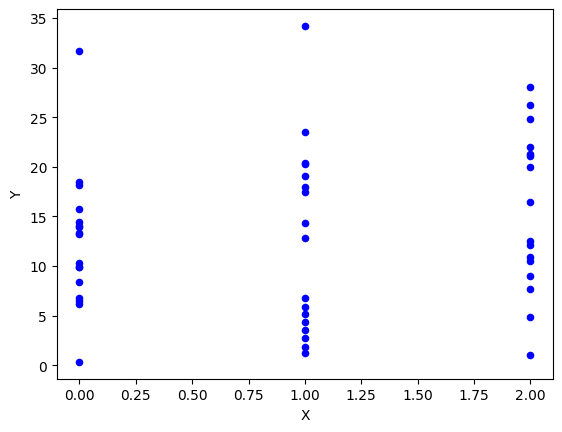

In [1135]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as sps

# Ваши данные
numbers_x = np.array([1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1])
numbers_y = np.array([34.19, 20.30, 28.02, 26.19, 10.52, 6.79, 5.20, 20.36, 31.64, 21.97, 8.39, 4.92, 23.54, 6.20, 5.86, 19.06, 14.00, 16.46, 17.43, 10.87, 18.47, 3.58, 10.33, 9.91, 12.49, 24.83, 1.87, 6.81, 15.72, 13.34, 14.47, 13.25, 13.97, 6.48, 9.02, 12.81, 19.94, 17.94, 9.94, 4.42, 21.33, 0.35, 18.21, 12.13, 21.09, 1.05, 1.20, 7.70, 2.74, 14.34])

# МНК функция
def linear_regression(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

# МНК оценки параметров
params, covariance = curve_fit(linear_regression, numbers_x, numbers_y)
beta_0, beta_1 = params

# Вывод оценок
print("beta_0",round(beta_0,2))
print("beta_1",round(beta_1,2))

# Построение графика данных и линии регрессии
plt.scatter(numbers_x, numbers_y, s=20, c='blue', label="Данные")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


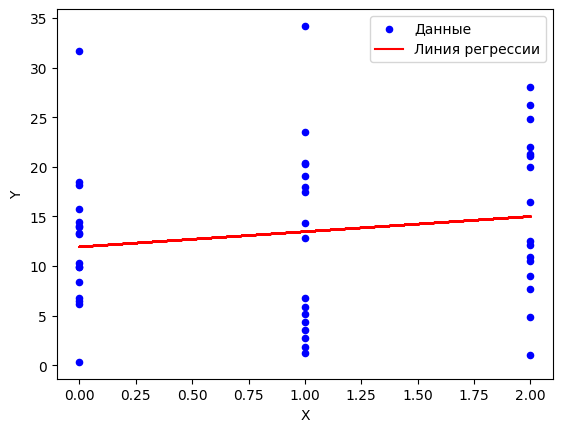

In [1136]:
plt.scatter(numbers_x, numbers_y, s=20, c='blue', label="Данные")
plt.plot(numbers_x, linear_regression(numbers_x, beta_0, beta_1), color='red', label="Линия регрессии")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Линейная регрессионная модель будет иметь вид:
$Y \approx 11.93 + 1.53 \cdot X$
Из графика видно, что наблюдаемые данные сильно отклоняются от построенной линии регрессии. Это может указывать на то, что линейная модель не является наилучшим приближением для этих данных.

### 2.Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт. 

In [1137]:
y_matrix = np.matrix(numbers_y).T
x_matrix = np.matrix([[1] * len(numbers_x), numbers_x])
b_matrix = np.linalg.inv(x_matrix * x_matrix.T) * x_matrix * y_matrix
print(b_matrix)
# Рассчет несмещенной оценки дисперсии
# np.linalg.norm() вычисляет норму вектора
# np.linalg.matrix_rank() вычисляет ранг матрицы
unbiased_variance  = np.linalg.norm(y_matrix - x_matrix.T * b_matrix)**2/(len(numbers_x) - np.linalg.matrix_rank(x_matrix))

print("Несмещённая оценка дисперсии:", round(unbiased_variance,2))

[[11.93211037]
 [ 1.53131595]]
Несмещённая оценка дисперсии: 66.12


Интервал 1: [-13.94:-11.04], Частота: 4
Интервал 2: [-11.04:-8.14], Частота: 5
Интервал 3: [-8.14:-5.24], Частота: 6
Интервал 4: [-5.24:-2.34], Частота: 6
Интервал 5: [-2.34:0.56], Частота: 4
Интервал 6: [0.56:3.46], Частота: 7
Интервал 7: [3.46:6.36], Частота: 8
Интервал 8: [6.36:9.26], Частота: 4
Интервал 9: [9.26:12.16], Частота: 3
Интервал 10: [12.16:15.06], Частота: 1
Интервал 11: [15.06:17.96], Частота: 0
Интервал 12: [17.96:20.86], Частота: 2
50


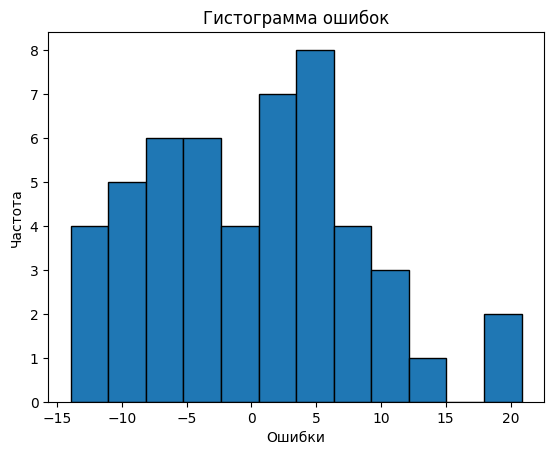

In [1138]:
#вычисляем вектор ошибок, который представляет собой разницу между фактическими значениями и предсказанными значениями на основе регрессии 
errors = y_matrix - x_matrix.T * b_matrix

hist_bins = np.arange(min(errors), max(errors) + h, h)

# Вычисление частот и границ бинов
hist_values, hist_edges = np.histogram(errors, bins=hist_bins)

total_elements = len(errors)
hist_values_normalized = hist_values / total_elements
# Вывод интервалов и частот всех бинов
for i in range(len(hist_values_normalized)):
    print(f"Интервал {i + 1}: [{hist_edges[i]:.2f}:{hist_edges[i + 1]:.2f}], Частота: {hist_values[i]}")
print(sum(hist_values))
# Построение гистограммы
plt.hist(errors, bins=hist_bins, edgecolor='black', density=True)
plt.xlabel("Ошибки")
plt.ylabel("Частота")
plt.title("Гистограмма ошибок")
plt.show()


In [1139]:
# Среднее значение ошибок
mean_errors = 0
# Стандартное отклонение ошибок на основе несмещенной оценки дисперсии
std_errors = np.sqrt(unbiased_variance)

# Заданные интервалы
intervals = [[-14, -8], [-7.9, -2.2], [-2.1, 3.5], [3.55, 6.4], [6.45, 21]]

# Экспериментальные частоты
freq_exp = [0] * len(intervals) 
# Теоретические частоты
freq_teor = [0] * len(intervals) 

for i in range(len(intervals)):
    num1 = intervals[i][0]
    num2 = intervals[i][-1]
    freq_exp[i] += len([x for x in errors if (x >= num1 and x < num2)])
    freq_teor[i] += len(errors) * (sps.norm.cdf(num2, loc=mean_errors, scale=std_errors) - sps.norm.cdf(num1, loc=mean_errors, scale=std_errors))
    if i == len(intervals) - 1:
        freq_teor[i] += len(errors) * sps.norm.sf(num2, loc=mean_errors, scale=std_errors)
    


freq_exp = np.array(freq_exp)
freq_teor = np.array(freq_teor)
chi_2 = np.sum((freq_exp - freq_teor) ** 2 / freq_teor)

print()
print("хи-квадрат:", round(chi_2,2))
print("x_a:", round(sps.chi2.ppf(1 - alpha, df=len(freq_exp) - 1),2))



хи-квадрат: 2.87
x_a: 5.99


In [1140]:
intervals = [[-14, -8], [-7.9, -2.2], [-2.1, 3.5], [3.55, 6.4], [6.45, "+inf"]]
data = list(zip(intervals, freq_exp, freq_teor))
headers = ["Интервал x","Экспериментальная частота","Гипотетическая частота"]
table = tabulate(data, headers=headers, tablefmt="plain")
print(table)

Интервал x        Экспериментальная частота    Гипотетическая частота
[-14, -8]                                 9                   6.0019
[-7.9, -2.2]                             12                  11.3863
[-2.1, 3.5]                              11                  13.4226
[3.55, 6.4]                               8                   5.77938
[6.45, '+inf']                           10                  10.6914



${\chi}^2 \approx 2.87$
<br>
$x_{\alpha} \approx 5.99$

$\chi^2 < x_{\alpha} \to$ гипотеза о нормальности принимается

In [1141]:
print("Статистика критерия Колмогорова:", round(sps.kstest([num[0,0] for num in errors], "norm", args = (mean_errors,std_errors)).statistic,4))
print("x_a:", round(sps.kstwobign.ppf(1 - alpha) / np.sqrt(len(errors)),4))

Статистика критерия Колмогорова: 0.0755
x_a: 0.1517


ㅤ
$D_n \approx 0.0755$
$x_a \approx 0.1517$
$D_n < x_a \to$ гипотеза о нормальности принимается

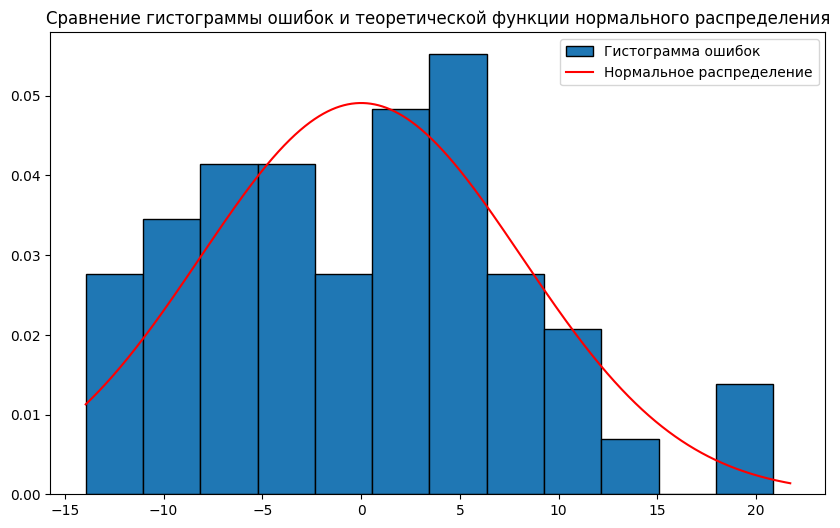

In [1142]:
plt.figure(figsize=(10, 6))

hist_values, hist_edges = np.histogram(errors, bins=hist_bins)

# Построение гистограммы
plt.hist(errors, bins=hist_bins, edgecolor='black', density=True, label='Гистограмма ошибок')

# Построение теоретической функции плотности нормального распределения
plt.plot(np.arange(min(errors), max(errors) + 1, 0.01), sps.norm.pdf(np.arange(min(errors), max(errors) + 1, 0.01), mean_errors, std_errors), c = 'red', label='Нормальное распределение')

# Добавление легенды
plt.legend()
plt.title("Сравнение гистограммы ошибок и теоретической функции нормального распределения")
plt.show()


### 3.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

#### Доверительный интервал для параметра $\beta_0$:
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$
<br>
$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$
<br>
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
<br>
$C = (1, 0)^\intercal$
<br>
$\hat{\psi} = \hat{\beta}_0$
<br>

In [1143]:
r = np.linalg.matrix_rank(x_matrix)

n = len(numbers_x)

x_a = sps.t.ppf(1 - alpha/2, df = n - r)

C = np.matrix([[1], [0]])

b = float(C.T * np.linalg.inv(x_matrix * x_matrix.T) * C)

print("x_a = ", x_a)
print("[", round(beta_0 - x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2), ",", round(beta_0 + x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2), "]", sep='')

x_a =  1.2994388784066297
[9.59,14.27]


ㅤ
$\left[9.59, 14.27\right] \ni \beta_0$

#### Доверительный интервал для параметра $\beta_1$:
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$
<br>
$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$
<br>
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
<br>
$C = (0, 1)^\intercal$
<br>
$\hat{\psi} = \hat{\beta}_1$

In [1144]:
r = np.linalg.matrix_rank(x_matrix)

n = len(numbers_x)

x_a = sps.t.ppf(1 - alpha/2, df = n - r)

C = np.matrix([[0], [1]])

b = float(C.T * np.linalg.inv(x_matrix * x_matrix.T) * C)
print("[", round(beta_1 - x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2), ",", round(beta_1 + x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2), "]", sep='')

[-0.31,3.37]


ㅤ
$\left[-0.31, 3.37\right] \ni \beta_1$

#### Доверительный эллипс для параметра $(\beta_0, \beta_1)$: (ХЗ ПРАВИЛЬНО ЧИ НЕТ)
$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$
<br>
$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$
<br>
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
<br>
$C = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}$
<br>
$\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$


In [1145]:
C = np.array([[1, 0],[0, 1]])
xx_t = x_matrix*x_matrix.T
xx_t_inv = np.linalg.inv(xx_t)
b = C.T * xx_t_inv * C
b_inv = np.linalg.inv(b)
q = 2
x_a = sps.f.ppf(1-alpha, dfn=q, dfd=n - r)
cov = b_inv
eigenvalues, _ = np.linalg.eig(cov)
print(np.sqrt(1 / eigenvalues * (x_a * q * unbiased_variance)))

[3.95028889 1.37230402]


Длины полуосей: 3.95 и 1.37

### 4.Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости
$H_0 : \psi = 0$ - основная гипотеза

In [1146]:
h_b0 = sum(numbers_y)/len(numbers_y)
h_b1 = 0

print("Оценка при выполнении гипотезы:(", h_b0,",", h_b1,")", sep='')
h_b_matrix = np.matrix([[h_b0],[h_b1]])
statistic_F = (np.linalg.norm(y_matrix - x_matrix.T * h_b_matrix)**2 - np.linalg.norm(y_matrix - x_matrix.T * b_matrix)**2)/2/unbiased_variance
print("F =", round(statistic_F,2))
print("x_a =", round(sps.f.ppf(1 - alpha, dfn = 2, dfd = n - r),2))

Оценка при выполнении гипотезы:(13.432800000000007,0)
F = 0.58
x_a = 1.66


ㅤ
$\mathbb{F} \approx 0.58$
<br>
$x_{\alpha} \approx 1.66$
<br>
$\mathbb{F} < x_{\alpha} \to$ гипотеза о независимости принимается

### 5.Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость. 

ㅤ
$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon$

beta_0:  12.44
beta_1:  -1.52
beta_2:  1.54


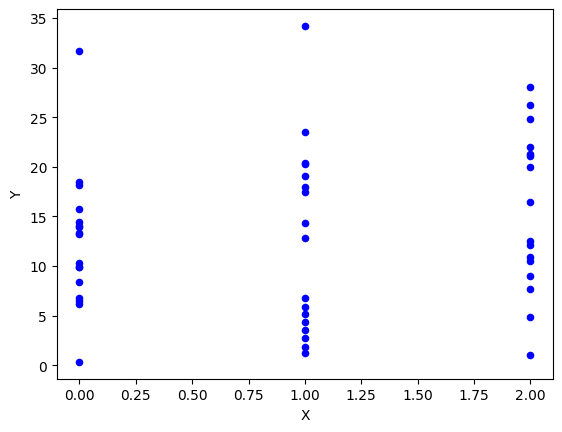

In [1147]:
def linear_regression2(x, beta_0, beta_1, beta_2):
    return beta_0 + beta_1 * x + beta_2*(x**2)

# МНК оценки параметров
params, covariance = curve_fit(linear_regression2, numbers_x, numbers_y)
beta_0, beta_1, beta_2 = params

# Вывод оценок
print("beta_0: ",round(beta_0,2))
print("beta_1: ",round(beta_1,2))
print("beta_2: ",round(beta_2,2))

# Построение графика данных и линии регрессии
plt.scatter(numbers_x, numbers_y, s=20, c='blue', label="Данные")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

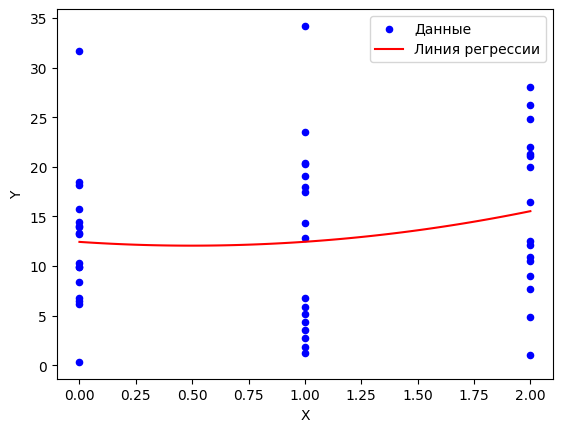

In [1148]:
# Построение графика данных и линии регрессии
# Построение графика данных и линии регрессии
plt.scatter(numbers_x, numbers_y, s=20, c='blue', label="Данные")
x_range = np.linspace(min(numbers_x), max(numbers_x), 100)  # Генерация значений X для более плавной линии регрессии
plt.plot(x_range, linear_regression2(x_range, beta_0, beta_1, beta_2), color='red', label="Линия регрессии")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Линейная регрессионная модель будет иметь вид:
$Y \approx 12.44 - 1.52 \cdot X + 1.54 \cdot X^2$
Из графика видно, что линейная модель не является наилучшим приближением для этих данных.

### 6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [1149]:
y_matrix = np.matrix(numbers_y).T
x_matrix = np.matrix([[1] * len(numbers_x), numbers_x, [x**2 for x in numbers_x]])
b_matrix = np.linalg.inv(x_matrix * x_matrix.T) * x_matrix * y_matrix
print(b_matrix)
# Рассчет несмещенной оценки дисперсии
# np.linalg.norm() вычисляет норму вектора
# np.linalg.matrix_rank() вычисляет ранг матрицы
unbiased_variance  = np.linalg.norm(y_matrix - x_matrix.T * b_matrix)**2/(len(numbers_x) - np.linalg.matrix_rank(x_matrix))

print("Несмещённая оценка дисперсии:", round(unbiased_variance,2))

[[12.43882353]
 [-1.52479779]
 [ 1.53597426]]
Несмещённая оценка дисперсии: 66.97


Интервал 1: [-14.48:-11.58], Частота: 2
Интервал 2: [-11.58:-8.68], Частота: 5
Интервал 3: [-8.68:-5.78], Частота: 7
Интервал 4: [-5.78:-2.88], Частота: 7
Интервал 5: [-2.88:0.02], Частота: 3
Интервал 6: [0.02:2.92], Частота: 8
Интервал 7: [2.92:5.82], Частота: 7
Интервал 8: [5.82:8.72], Частота: 5
Интервал 9: [8.72:11.62], Частота: 3
Интервал 10: [11.62:14.52], Частота: 1
Интервал 11: [14.52:17.42], Частота: 0
Интервал 12: [17.42:20.32], Частота: 1
Интервал 13: [20.32:23.22], Частота: 1
50


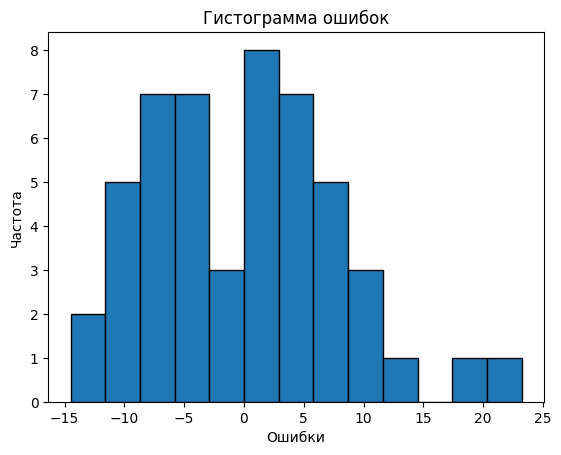

In [1150]:
#вычисляем вектор ошибок, который представляет собой разницу между фактическими значениями и предсказанными значениями на основе регрессии 
errors = y_matrix - x_matrix.T * b_matrix

hist_bins = np.arange(min(errors), max(errors) + h, h)

# Вычисление частот и границ бинов
hist_values, hist_edges = np.histogram(errors, bins=hist_bins)

total_elements = len(errors)
hist_values_normalized = hist_values/ total_elements
# Вывод интервалов и частот всех бинов
for i in range(len(hist_values)):
    print(f"Интервал {i + 1}: [{hist_edges[i]:.2f}:{hist_edges[i + 1]:.2f}], Частота: {hist_values[i]}")
print(sum(hist_values))
# Построение гистограммы
plt.hist(errors, bins=hist_bins, edgecolor='black', density = True)
plt.xlabel("Ошибки")
plt.ylabel("Частота")
plt.title("Гистограмма ошибок")
plt.show()

In [1151]:
# Среднее значение ошибок
mean_errors = 0
# Стандартное отклонение ошибок на основе несмещенной оценки дисперсии
std_errors = np.sqrt(unbiased_variance)

# Заданные интервалы
intervals = [[-14.5, -5.75], [-5.74, 0.1], [0.11, 3], [3.01, 6], [6.01, 24]]

# Экспериментальные частоты
freq_exp = [0] * len(intervals) 
# Теоретические частоты
freq_teor = [0] * len(intervals) 


for i in range(len(intervals)):
    num1 = intervals[i][0]
    num2 = intervals[i][-1]
    freq_exp[i] += len([x for x in errors if (x >= num1 and x < num2)])
    freq_teor[i] += len(errors) * (sps.norm.cdf(num2, loc=mean_errors, scale=std_errors) - sps.norm.cdf(num1, loc=mean_errors, scale=std_errors))
    if i == len(intervals) - 1:
        freq_teor[i] += len(errors) * sps.norm.sf(num2, loc=mean_errors, scale=std_errors)
    

freq_exp = np.array(freq_exp)
freq_teor = np.array(freq_teor)
chi_2 = np.sum((freq_exp - freq_teor) ** 2 / freq_teor)

print()
print("хи-квадрат:", round(chi_2,2))
print("x_a:", round(sps.chi2.ppf(1 - alpha, df=len(freq_exp) - 1),2))


хи-квадрат: 2.53
x_a: 5.99


In [1152]:
intervals = [[-14.5, -5.75], [-5.74, 0.1], [0.11, 3], [3.01, 6], [6.01, "+inf"]]
data = list(zip(intervals, freq_exp, freq_teor))
headers = ["Интервал x","Экспериментальная частота","Гипотетическая частота"]
table = tabulate(data, headers=headers, tablefmt="plain")
print(table)

Интервал x        Экспериментальная частота    Гипотетическая частота
[-14.5, -5.75]                           14                  10.1465
[-5.74, 0.1]                             10                  13.168
[0.11, 3]                                 8                   6.88401
[3.01, 6]                                 7                   6.23928
[6.01, '+inf']                           11                  11.5672


${\chi}^2 \approx 2.53$
<br>
$x_{\alpha} \approx 5.99$

$\chi^2 < x_{\alpha} \to$ гипотеза о нормальности принимается

In [1153]:
print("Статистика критерия Колмогорова:", round(sps.kstest([num[0,0] for num in errors], "norm", args = (mean_errors,std_errors)).statistic,4))
print("x_a:", round(sps.kstwobign.ppf(1 - alpha) / np.sqrt(len(errors)),4))

Статистика критерия Колмогорова: 0.0817
x_a: 0.1517


ㅤ
$D_n \approx 0.0817$
$x_a \approx 0.1517$
$D_n < x_a \to$ гипотеза о нормальности принимается

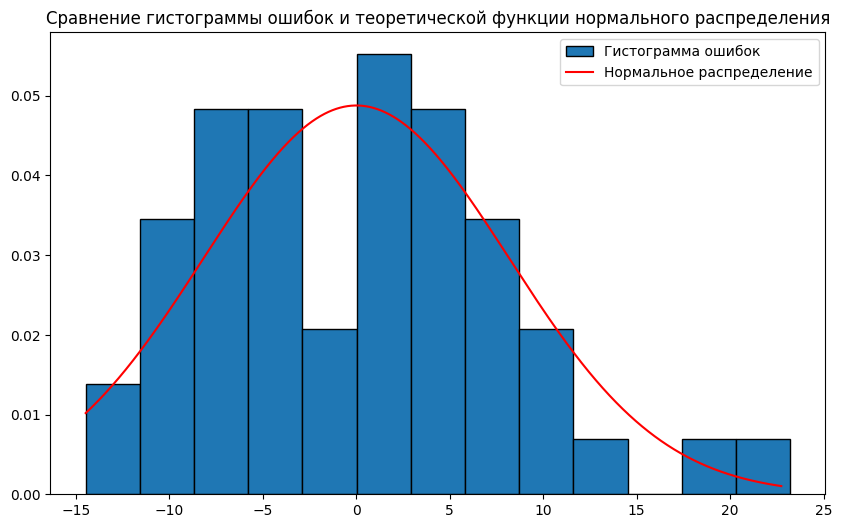

In [1154]:
plt.figure(figsize=(10, 6))

hist_values, hist_edges = np.histogram(errors, bins=hist_bins)

# Построение гистограммы
plt.hist(errors, bins=hist_bins, edgecolor='black', density=True, label='Гистограмма ошибок')

# Построение теоретической функции плотности нормального распределения
plt.plot(np.arange(min(errors), max(errors) + 1, 0.01), sps.norm.pdf(np.arange(min(errors), max(errors) + 1, 0.01), mean_errors, std_errors), c = 'red', label='Нормальное распределение')

# Добавление легенды
plt.legend()
plt.title("Сравнение гистограммы ошибок и теоретической функции нормального распределения")
plt.show()

### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

#### Доверительный интервал для параметра $\beta_0$:
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$
<br>
$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$
<br>
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
<br>
$C = (1, 0, 0)^\intercal$
<br>
$\psi = C^\intercal \beta = \beta_0$

In [1155]:
r = np.linalg.matrix_rank(x_matrix)

n = len(numbers_x)

x_a = sps.t.ppf(1 - alpha/2, df = n - r)

C = np.matrix([[1], [0], [0]])

b = float(C.T * np.linalg.inv(x_matrix * x_matrix.T) * C)

print("x_a = ", x_a)
print("[",round(beta_0 - x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2),",",round(beta_0 + x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2),"]", sep='')

x_a =  1.2998249470173255
[9.86,15.02]


ㅤ
$\left[9.86, 15.02\right] \ni \beta_0$

#### Доверительный интервал для параметра $\beta_1$:
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$
<br>
$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$
<br>
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
<br>
$C = (0, 1, 0)^\intercal$
<br>
$\psi = C^\intercal \beta = \beta_1$

In [1156]:
r = np.linalg.matrix_rank(x_matrix)

n = len(numbers_x)

x_a = sps.t.ppf(1 - alpha/2, df = n - r)

C = np.matrix([[0], [1], [0]])

b = float(C.T * np.linalg.inv(x_matrix * x_matrix.T) * C)

print("x_a = ", x_a)
print("[",round(beta_1 - x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2),",",round(beta_1 + x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2),"]", sep='')

x_a =  1.2998249470173255
[-8.11,5.06]


ㅤ
$\left[-8.11, 5.06\right] \ni \beta_1$

#### Доверительный интервал для параметра $\beta_2$:
$\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$
<br>
$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$
<br>
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
<br>
$C = (0, 0, 1)^\intercal$
<br>
$\psi = C^\intercal \beta = \beta_2$

In [1157]:
r = np.linalg.matrix_rank(x_matrix)

n = len(numbers_x)

x_a = sps.t.ppf(1 - alpha/2, df = n - r)

C = np.matrix([[0], [0], [1]])

b = float(C.T * np.linalg.inv(x_matrix * x_matrix.T) * C)

print("x_a = ", x_a)
print("[",round(beta_2 - x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2),",",round(beta_2 + x_a * np.sqrt(unbiased_variance) * np.sqrt(b),2),"]", sep='')

x_a =  1.2998249470173255
[-1.64,4.71]


ㅤ
$\left[-1.64, 4.71\right] \ni \beta_2$

#### Доверительный эллипсоид
$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$
<br>
$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$
<br>
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$
<br>
$C = \begin{pmatrix}1 & 0 & 0\\0 & 1 &0 \\ 0&0&1 \end{pmatrix}$
<br>
$\psi = C^\intercal \beta = (\beta_0, \beta_1, \beta_2)^\intercal$
<br>

In [1158]:
r = np.linalg.matrix_rank(x_matrix)

# Установка значений переменных
n = len(numbers_x)
q = len(b_matrix)
c_level = 1 - alpha

# Рассчет значения x_a
x_a = sps.f.ppf(c_level, dfn=q, dfd=n - r)

# Создание матрицы C
C_matrix = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Вычисление матрицы b_p
b_p = C_matrix.T * np.linalg.inv(x_matrix * x_matrix.T) * C_matrix

# Вывод определителя матрицы b_p
print(b_p)
print("det b_p = ", np.linalg.det(b_p))

[[ 0.05882353 -0.08823529  0.02941176]
 [-0.08823529  0.38327206 -0.17738971]
 [ 0.02941176 -0.17738971  0.08915441]]
det b_p =  5.4065743944637025e-05


ㅤ
$B=C^{T}(XX^{T})^{-1}C$
$detB \approx 5.407 \cdot 10^{-5}$ 

In [1159]:
# Вывод критического значения x_a
print("x_a = ", x_a)

x_a =  1.6085202639061869


ㅤ
$x_{\alpha} \approx 1.609$

In [1160]:
x_s = sympy.Symbol('x', real=True)
y_s = sympy.Symbol('y', real=True)
z_s = sympy.Symbol('z', real=True)

vector = np.matrix([[x_s], [y_s], [z_s]])

expression = (vector - b_matrix).T * np.linalg.inv(b_p) * (vector - b_matrix)
print(expression[0,0].as_poly().as_expr())
print(q * unbiased_variance * x_a)


49.9999999999999*x**2 + 97.9999999999996*x*y + 161.999999999999*x*z - 1343.28*x + 80.9999999999997*y**2 + 289.999999999999*y*z - 1417.42*y + 272.999999999999*z**2 - 2411.53999999999*z + 9125.80367977941
323.14471747572435


Неравенство примет примерно следующий вид:
$50x^2 + 98xy + 162xz-1343.28x + 81y^2 + 290yz - 1417.42y + 273z^2 - 2411.54z + 9125.804 <= 323.1447$

In [1161]:
expression = expression[0,0].as_poly().as_expr() - q * unbiased_variance * x_a
x_s = sympy.Symbol("x'", real=True)
y_s = sympy.Symbol("y'", real=True)
z_s = sympy.Symbol("z'", real=True)

# Расчет коэффициентов итогового неравенства
eigenvalues, _ = np.linalg.eig(np.linalg.inv(b_p))
coefficients = eigenvalues / (x_a * q * unbiased_variance)
expression = coefficients[0] * x_s**2 + coefficients[1] * y_s**2 + coefficients[2] * z_s**2
print(expression)

1.17020194970091*x'**2 + 0.0736521402664703*y'**2 + 0.00635975587817215*z'**2


В итоговом виде неравенство для эллипсоида будет выглядеть примерно так:
$1.1702x'^2 + 0.0736y'^2 + 0.0064z'^2 <= 1$

In [1162]:
# Вывод длин полуосей эллипсоида
print(np.sqrt(1/coefficients[0]), np.sqrt(1/coefficients[1]), np.sqrt(1/coefficients[2]))


0.9244205499486974 3.684743947914776 12.53948722412987


Длины полуосей будут примерно такими: 0.9244, 3.6847, 12.5395

### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить ее значимость на уровне $\alpha$.
$H_0 : \psi = 0$ - основная гипотеза

In [1163]:
q = len(b_matrix)
x_h_matrix = np.matrix([[1] * len(numbers_x), numbers_x])

h_b_matrix = np.linalg.inv(x_h_matrix * x_h_matrix.T) * x_h_matrix * y_matrix

h_b0 = float(h_b_matrix[0])
h_b1 = float(h_b_matrix[1])
h_b2 = 0

h_b_matrix = np.matrix([[h_b0], [h_b1], [h_b2]])

print("Оценка при выполнении гипотезы: (",round(h_b0,2),',',round(h_b1,2),',',round(h_b2,2),')', sep='')
statistic_F = (np.linalg.norm(y_matrix - x_matrix.T * h_b_matrix)**2 - np.linalg.norm(y_matrix - x_matrix.T * b_matrix)**2)/q/unbiased_variance
print("F =", round(statistic_F,2))
print("x_a =", round(sps.f.ppf(1 - alpha, dfn = q, dfd = n - r),2))

Оценка при выполнении гипотезы: (11.93,1.53,0)
F = 0.13
x_a = 1.61


ㅤ
$\mathbb{F} \approx 0.13$
<br>
$x_{\alpha} \approx 1.61$
<br>
$\mathbb{F} < x_{\alpha} \to$ гипотеза о квадратичной регрессионной независимости принимается

## Выводы

Были изучены основные принципы метода наименьших квадратов (МНК), а также статистические свойства МНК-оценок, функции регрессии и роль МНК в регрессионном анализе.
Были приобретены навыки по построению МНК-оценок, созданию доверительных эллипсов и эллипсоидов, а также проверке гипотез о независимости и линейной регрессионной зависимости.
Были сделаны выводы о нормальности вектора ошибок и характере взаимосвязи в данных